In [80]:
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import csv

In [2]:
# doesn't work in Seth's Jupyter Notebook, but this is used in the Windows command prompt

# reads data from the serial port, preferably on windows

#
# NOTE: The serial port cannot be monitored by two programs at once
# That is to say, you cannot use SerialPy and PuTTY at once
#
import serial

ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM3'

ser.open()

def read(num):
    """Reads the input a user-specified number of times"""
    readings = [None] * num
    for i in range(num):
        line = ser.readline()
        readings[i] = line
    return readings

NameError: name 'serial' is not defined

In [25]:
cycletime = input("How long is each cycle? (seconds)")
thresh = input("What is the threshold temperature? (Kelvin)")

How long is each cycle?3
What is the threshold temperature?298.15


In [81]:
lines = [b'Cyclecount1,Heatcount1,1,Temperature1908,\n', b'Cyclecount1,Heatcount1,1,Temperature1879,\n', b'Cyclecount2,Heatcount2,1,Temperature1895,\n', b'Cyclecount3,Heatcount3,1,Temperature1899,\n', b'Cyclecount4,Heatcount4,1,Temperature1906,\n', b'Cyclecount5,Heatcount5,1,Temperature1906,\n', b'Cyclecount6,Heatcount6,1,Temperature1500,\n', b'Cyclecount7,Heatcount7,1,Temperature1094,\n', b'Cyclecount8,Heatcount8,1,Temperature1332,\n', b'Cyclecount9,Heatcount9,1,Temperature2901,\n', b'Cyclecount10,Heatcount10,1,Temperature2900,\n', b'Cyclecount11,Heatcount10,0,Temperature4031,\n', b'Cyclecount12,Heatcount10,0,Temperature4027,\n', b'Cyclecount13,Heatcount10,0,Temperature4028,\n', b'Cyclecount14,Heatcount10,0,Temperature4027,\n', b'Cyclecount15,Heatcount10,0,Temperature4028,\n', b'Cyclecount16,Heatcount10,0,Temperature4023,\n', b'Cyclecount17,Heatcount10,0,Temperature4024,\n', b'Cyclecount18,Heatcount10,0,Temperature4024,\n', b'Cyclecount19,Heatcount11,1,Temperature1433,\n', b'Cyclecount20,Heatcount12,1,Temperature1094,\n', b'Cyclecount21,Heatcount13,1,Temperature1085,\n', b'Cyclecount22,Heatcount14,1,Temperature1093,\n', b'Cyclecount23,Heatcount15,1,Temperature1128,\n', b'Cyclecount24,Heatcount16,1,Temperature2074,\n', b'Cyclecount25,Heatcount17,1,Temperature2090,\n', b'Cyclecount26,Heatcount18,1,Temperature2083,\n', b'Cyclecount27,Heatcount19,1,Temperature2082,\n', b'Cyclecount28,Heatcount20,1,Temperature2081,\n', b'Cyclecount29,Heatcount21,1,Temperature1783,\n', b'Cyclecount30,Heatcount22,1,Temperature1000,\n', b'Cyclecount31,Heatcount23,1,Temperature833,\n', b'Cyclecount32,Heatcount24,1,Temperature832,\n', b'Cyclecount33,Heatcount25,1,Temperature823,\n', b'Cyclecount34,Heatcount26,1,Temperature923,\n', b'Cyclecount35,Heatcount27,1,Temperature1377,\n', b'Cyclecount36,Heatcount27,0,Temperature4044,\n', b'Cyclecount37,Heatcount28,1,Temperature1862,\n', b'Cyclecount38,Heatcount28,0,Temperature4030,\n', b'Cyclecount39,Heatcount29,1,Temperature1363,\n', b'Cyclecount40,Heatcount30,1,Temperature1352,\n', b'Cyclecount41,Heatcount31,1,Temperature2116,\n', b'Cyclecount42,Heatcount32,1,Temperature2105,\n', b'Cyclecount43,Heatcount32,0,Temperature4031,\n', b'Cyclecount44,Heatcount32,0,Temperature3998,\n', b'Cyclecount45,Heatcount33,1,Temperature1191,\n', b'Cyclecount46,Heatcount34,1,Temperature1322,\n', b'Cyclecount47,Heatcount34,0,Temperature3411,\n', b'Cyclecount48,Heatcount35,1,Temperature1273,\n', b'Cyclecount49,Heatcount36,1,Temperature1497,\n', b'Cyclecount50,Heatcount36,0,Temperature4031,\n', b'Cyclecount51,Heatcount37,1,Temperature1364,\n', b'Cyclecount52,Heatcount38,1,Temperature2935,\n', b'Cyclecount53,Heatcount39,1,Temperature2943,\n', b'Cyclecount54,Heatcount40,1,Temperature2948,\n', b'Cyclecount55,Heatcount40,0,Temperature4030,\n', b'Cyclecount56,Heatcount40,0,Temperature4027,\n', b'Cyclecount57,Heatcount40,0,Temperature4028,\n', b'Cyclecount58,Heatcount40,0,Temperature4027,\n', b'Cyclecount59,Heatcount40,0,Temperature4024,\n', b'Cyclecount60,Heatcount40,0,Temperature4006,\n', b'Cyclecount61,Heatcount41,1,Temperature1386,\n', b'Cyclecount62,Heatcount42,1,Temperature1013,\n', b'Cyclecount63,Heatcount43,1,Temperature1022,\n', b'Cyclecount64,Heatcount44,1,Temperature1014,\n', b'Cyclecount65,Heatcount45,1,Temperature1013,\n', b'Cyclecount66,Heatcount46,1,Temperature1022,\n', b'Cyclecount67,Heatcount47,1,Temperature1021,\n', b'Cyclecount68,Heatcount48,1,Temperature1012,\n', b'Cyclecount69,Heatcount49,1,Temperature1012,\n', b'Cyclecount70,Heatcount50,1,Temperature1011,\n', b'Cyclecount71,Heatcount51,1,Temperature1020,\n', b'Cyclecount72,Heatcount52,1,Temperature1019,\n', b'Cyclecount73,Heatcount53,1,Temperature1019,\n', b'Cyclecount74,Heatcount54,1,Temperature1020,\n', b'Cyclecount75,Heatcount55,1,Temperature1011,\n', b'Cyclecount76,Heatcount56,1,Temperature1009,\n', b'Cyclecount77,Heatcount57,1,Temperature1008,\n', b'Cyclecount78,Heatcount58,1,Temperature816,\n', b'Cyclecount79,Heatcount59,1,Temperature770,\n', b'Cyclecount80,Heatcount60,1,Temperature805,\n', b'Cyclecount81,Heatcount61,1,Temperature1020,\n', b'Cyclecount82,Heatcount62,1,Temperature1660,\n', b'Cyclecount83,Heatcount62,0,Temperature4031,\n', b'Cyclecount84,Heatcount63,1,Temperature2327,\n', b'Cyclecount85,Heatcount63,0,Temperature4030,\n', b'Cyclecount86,Heatcount63,0,Temperature4025,\n', b'Cyclecount87,Heatcount63,0,Temperature4024,\n', b'Cyclecount88,Heatcount63,0,Temperature4026,\n', b'Cyclecount89,Heatcount63,0,Temperature4023,\n', b'Cyclecount90,Heatcount63,0,Temperature4024,\n', b'Cyclecount91,Heatcount63,0,Temperature4026,\n', b'Cyclecount92,Heatcount63,0,Temperature4024,\n', b'Cyclecount93,Heatcount63,0,Temperature4026,\n', b'Cyclecount94,Heatcount63,0,Temperature4025,\n', b'Cyclecount95,Heatcount63,0,Temperature4026,\n', b'Cyclecount96,Heatcount63,0,Temperature4026,\n', b'Cyclecount97,Heatcount63,0,Temperature4025,\n', b'Cyclecount98,Heatcount63,0,Temperature4024,\n', b'Cyclecount99,Heatcount63,0,Temperature4025,\n']

In [82]:
lines

[b'Cyclecount1,Heatcount1,1,Temperature1908,\n',
 b'Cyclecount1,Heatcount1,1,Temperature1879,\n',
 b'Cyclecount2,Heatcount2,1,Temperature1895,\n',
 b'Cyclecount3,Heatcount3,1,Temperature1899,\n',
 b'Cyclecount4,Heatcount4,1,Temperature1906,\n',
 b'Cyclecount5,Heatcount5,1,Temperature1906,\n',
 b'Cyclecount6,Heatcount6,1,Temperature1500,\n',
 b'Cyclecount7,Heatcount7,1,Temperature1094,\n',
 b'Cyclecount8,Heatcount8,1,Temperature1332,\n',
 b'Cyclecount9,Heatcount9,1,Temperature2901,\n',
 b'Cyclecount10,Heatcount10,1,Temperature2900,\n',
 b'Cyclecount11,Heatcount10,0,Temperature4031,\n',
 b'Cyclecount12,Heatcount10,0,Temperature4027,\n',
 b'Cyclecount13,Heatcount10,0,Temperature4028,\n',
 b'Cyclecount14,Heatcount10,0,Temperature4027,\n',
 b'Cyclecount15,Heatcount10,0,Temperature4028,\n',
 b'Cyclecount16,Heatcount10,0,Temperature4023,\n',
 b'Cyclecount17,Heatcount10,0,Temperature4024,\n',
 b'Cyclecount18,Heatcount10,0,Temperature4024,\n',
 b'Cyclecount19,Heatcount11,1,Temperature1433,\n',


In [83]:
for i in lines:
    print(i)

b'Cyclecount1,Heatcount1,1,Temperature1908,\n'
b'Cyclecount1,Heatcount1,1,Temperature1879,\n'
b'Cyclecount2,Heatcount2,1,Temperature1895,\n'
b'Cyclecount3,Heatcount3,1,Temperature1899,\n'
b'Cyclecount4,Heatcount4,1,Temperature1906,\n'
b'Cyclecount5,Heatcount5,1,Temperature1906,\n'
b'Cyclecount6,Heatcount6,1,Temperature1500,\n'
b'Cyclecount7,Heatcount7,1,Temperature1094,\n'
b'Cyclecount8,Heatcount8,1,Temperature1332,\n'
b'Cyclecount9,Heatcount9,1,Temperature2901,\n'
b'Cyclecount10,Heatcount10,1,Temperature2900,\n'
b'Cyclecount11,Heatcount10,0,Temperature4031,\n'
b'Cyclecount12,Heatcount10,0,Temperature4027,\n'
b'Cyclecount13,Heatcount10,0,Temperature4028,\n'
b'Cyclecount14,Heatcount10,0,Temperature4027,\n'
b'Cyclecount15,Heatcount10,0,Temperature4028,\n'
b'Cyclecount16,Heatcount10,0,Temperature4023,\n'
b'Cyclecount17,Heatcount10,0,Temperature4024,\n'
b'Cyclecount18,Heatcount10,0,Temperature4024,\n'
b'Cyclecount19,Heatcount11,1,Temperature1433,\n'
b'Cyclecount20,Heatcount12,1,Temperature

In [84]:
split = [None] * len(lines)
for index, item in enumerate(lines):
    split[index] = (str(item)).split(',')
split

[["b'Cyclecount1", 'Heatcount1', '1', 'Temperature1908', "\\n'"],
 ["b'Cyclecount1", 'Heatcount1', '1', 'Temperature1879', "\\n'"],
 ["b'Cyclecount2", 'Heatcount2', '1', 'Temperature1895', "\\n'"],
 ["b'Cyclecount3", 'Heatcount3', '1', 'Temperature1899', "\\n'"],
 ["b'Cyclecount4", 'Heatcount4', '1', 'Temperature1906', "\\n'"],
 ["b'Cyclecount5", 'Heatcount5', '1', 'Temperature1906', "\\n'"],
 ["b'Cyclecount6", 'Heatcount6', '1', 'Temperature1500', "\\n'"],
 ["b'Cyclecount7", 'Heatcount7', '1', 'Temperature1094', "\\n'"],
 ["b'Cyclecount8", 'Heatcount8', '1', 'Temperature1332', "\\n'"],
 ["b'Cyclecount9", 'Heatcount9', '1', 'Temperature2901', "\\n'"],
 ["b'Cyclecount10", 'Heatcount10', '1', 'Temperature2900', "\\n'"],
 ["b'Cyclecount11", 'Heatcount10', '0', 'Temperature4031', "\\n'"],
 ["b'Cyclecount12", 'Heatcount10', '0', 'Temperature4027', "\\n'"],
 ["b'Cyclecount13", 'Heatcount10', '0', 'Temperature4028', "\\n'"],
 ["b'Cyclecount14", 'Heatcount10', '0', 'Temperature4027', "\\n'"],


In [85]:
for i in split:
    i.pop()
split

[["b'Cyclecount1", 'Heatcount1', '1', 'Temperature1908'],
 ["b'Cyclecount1", 'Heatcount1', '1', 'Temperature1879'],
 ["b'Cyclecount2", 'Heatcount2', '1', 'Temperature1895'],
 ["b'Cyclecount3", 'Heatcount3', '1', 'Temperature1899'],
 ["b'Cyclecount4", 'Heatcount4', '1', 'Temperature1906'],
 ["b'Cyclecount5", 'Heatcount5', '1', 'Temperature1906'],
 ["b'Cyclecount6", 'Heatcount6', '1', 'Temperature1500'],
 ["b'Cyclecount7", 'Heatcount7', '1', 'Temperature1094'],
 ["b'Cyclecount8", 'Heatcount8', '1', 'Temperature1332'],
 ["b'Cyclecount9", 'Heatcount9', '1', 'Temperature2901'],
 ["b'Cyclecount10", 'Heatcount10', '1', 'Temperature2900'],
 ["b'Cyclecount11", 'Heatcount10', '0', 'Temperature4031'],
 ["b'Cyclecount12", 'Heatcount10', '0', 'Temperature4027'],
 ["b'Cyclecount13", 'Heatcount10', '0', 'Temperature4028'],
 ["b'Cyclecount14", 'Heatcount10', '0', 'Temperature4027'],
 ["b'Cyclecount15", 'Heatcount10', '0', 'Temperature4028'],
 ["b'Cyclecount16", 'Heatcount10', '0', 'Temperature4023'],


In [86]:
cyclecount = [None] * len(lines)
for index, item in enumerate(split):
    cyclecount[index] = item[0].strip("b'Cyclecount")
cyclecount = np.array(cyclecount, dtype='int')
cyclecount

array([ 1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [87]:
heatcount = [None] * len(lines)
for index, item in enumerate(split):
    heatcount[index] = item[1].strip("Heatcount")
heatcount = np.array(heatcount, dtype='int')
heatcount

array([ 1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 27, 28, 28, 29, 30, 31, 32, 32, 32, 33, 34, 34, 35, 36, 36,
       37, 38, 39, 40, 40, 40, 40, 40, 40, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 62, 63,
       63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63])

In [88]:
heater_status = [None] * len(lines)
for index, item in enumerate(split):
    heater_status[index] = item[2]
heater_status = np.array(heater_status, dtype='int')
heater_status

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
temperatures_raw = [None] * len(lines)
for index, item in enumerate(split):
    temperatures_raw[index] = item[3].strip("Temperature")
temperatures_raw = np.array(temperatures_raw, dtype='int')
temperatures_raw

array([1908, 1879, 1895, 1899, 1906, 1906, 1500, 1094, 1332, 2901, 2900,
       4031, 4027, 4028, 4027, 4028, 4023, 4024, 4024, 1433, 1094, 1085,
       1093, 1128, 2074, 2090, 2083, 2082, 2081, 1783, 1000,  833,  832,
        823,  923, 1377, 4044, 1862, 4030, 1363, 1352, 2116, 2105, 4031,
       3998, 1191, 1322, 3411, 1273, 1497, 4031, 1364, 2935, 2943, 2948,
       4030, 4027, 4028, 4027, 4024, 4006, 1386, 1013, 1022, 1014, 1013,
       1022, 1021, 1012, 1012, 1011, 1020, 1019, 1019, 1020, 1011, 1009,
       1008,  816,  770,  805, 1020, 1660, 4031, 2327, 4030, 4025, 4024,
       4026, 4023, 4024, 4026, 4024, 4026, 4025, 4026, 4026, 4025, 4024,
       4025])

In [90]:
# convert raw temp to real temp
R_2 = 28500
therm_resistances = R_2 * ((4095 / temperatures_raw) - 1)
therm_resistances

array([ 32667.45283019,  33611.49547632,  33087.07124011,  32957.34597156,
        32731.63693599,  32731.63693599,  49305.        ,  78179.61608775,
        59118.24324324,  11730.09307135,  11743.96551724,    452.49317787,
          481.25155202,    474.05660377,    481.25155202,    474.05660377,
          510.06711409,    502.85785288,    502.85785288,  52942.77739009,
        78179.61608775,  79064.51612903,  78277.21866423,  74964.09574468,
        27771.69720347,  27340.90909091,  27528.56457033,  27555.47550432,
        27582.41230178,  36955.69265283,  88207.5       , 111605.04201681,
       111773.4375    , 113307.41190765,  97943.66197183,  56254.90196078,
          359.42136499,  34178.57142857,    459.67741935,  57125.45854732,
        57822.11538462,  26654.7731569 ,  26942.99287411,    452.49317787,
          691.47073537,  69491.18387909,  59781.01361573,   5715.03957784,
        63179.10447761,  49460.92184369,    452.49317787,  57062.68328446,
        11264.05451448,  

In [91]:
R_0 = 30000 # resistance of thermistor at room temperature
T_0 = 298.15 # 20C in Kelvin
# beta for cryogenic temps
#B = 3454
# beta for 25/85 C, we're aiming for 25C, room temp
B = 3943
r_inf = R_0 * np.exp(-B / T_0)

In [92]:
# Beta equation from wikipedia, gives absolute temps
T = B / (np.log(therm_resistances / r_inf))
T

array([296.24189746, 295.60917539, 295.95809594, 296.04538922,
       296.19821692, 296.19821692, 287.35475297, 278.01479642,
       283.6031835 , 320.93839313, 320.90752078, 436.62141571,
       433.66249275, 434.38213963, 433.66249275, 434.38213963,
       430.90652378, 431.57790054, 431.57790054, 285.87169425,
       278.01479642, 277.79434196, 277.99034142, 278.84053573,
       299.90020687, 300.25722894, 300.10091555, 300.07859995,
       300.05628804, 293.52191725, 275.66908034, 271.20801918,
       271.17989678, 270.92591793, 273.66585223, 284.61951777,
       448.04631104, 295.23885303, 435.86114154, 284.30436645,
       284.05610157, 300.83947428, 300.59281479, 436.62141571,
       417.03883518, 280.34347885, 283.37595345, 340.88971797,
       282.25448161, 287.28864706, 436.62141571, 284.3269074 ,
       322.00093496, 322.25469159, 322.41403821, 435.86114154,
       433.66249275, 434.38213963, 433.66249275, 431.57790054,
       420.96019369, 284.82164636, 275.99953373, 276.22

In [93]:
# use cycle time here
time =  3 * cyclecount
time[0] = 0
time

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153,
       156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192,
       195, 198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231,
       234, 237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270,
       273, 276, 279, 282, 285, 288, 291, 294, 297])

In [108]:
heater_status_clone = np.copy(heater_status)
for index, item in enumerate(T):
    if heater_status_clone[index] == 1:
        heater_status_clone[index] = item
    else:
        # by setting to -100, we effectively remove these points from the window
        heater_status_clone[index] = -100

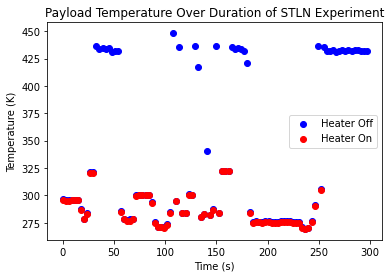

In [114]:
x = time
y1 = T
y2 = heater_status_clone
#y2 = T * heater_status

fig, ax = plt.subplots()

# when the heater was on, the points are red, when it was off, the points are blue
ax.scatter(x, y1, color='blue', label='Heater Off')
ax.scatter(x, y2, color='red', label='Heater On')
#ax.plot(x, y1, color='orange')
ax.set_title('Payload Temperature Over Duration of STLN Experiment')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Temperature (K)')
ax.set_ylim(np.min(T)-10, np.max(T)+10)
ax.legend(loc='best')

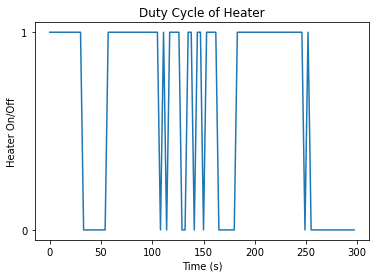

In [103]:
x = time
y = heater_status

fig, ax = plt.subplots()

ax.plot(x, y, label='Duty Cycle')
ax.set_title('Duty Cycle of Heater')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Heater On/Off')
#ax.text(time[-1] + 20, 0.05, '1 = ON, 0 = OFF')
ax.set_yticks((np.arange(0, 2)))